In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Training and Visualizing a Decision Tree

The DecisionTreeClassifier in scikit-learn uses randomness to enhance efficiency. Instead of evaluating all possible splits on all features, which is time-consuming, it sometimes considers only a random subset of features or potential splits. This speeds up training and can also help reduce overfitting.

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target.values

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

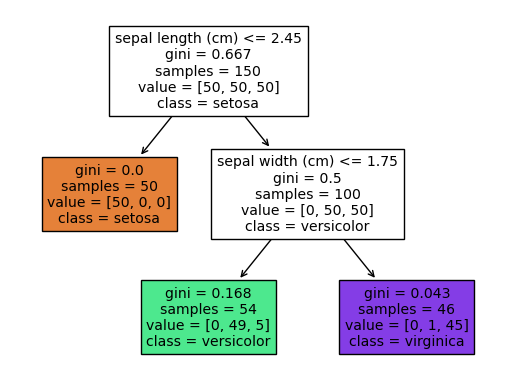

In [3]:
# Plot the decision tree
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names);

# Making Predictions

<AxesSubplot:>

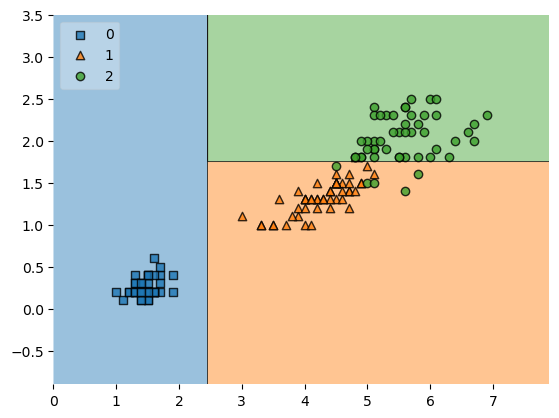

In [4]:
# Do first: pip install mlxtend
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_iris, y_iris, clf=tree_clf, legend=2)

# Estimating Class Probabilities 

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

In [7]:
# find the name of the predicted class
iris.target_names[tree_clf.predict([[5, 1.5]])[0]]

'versicolor'

# Regularization Hyperparameters

In [8]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

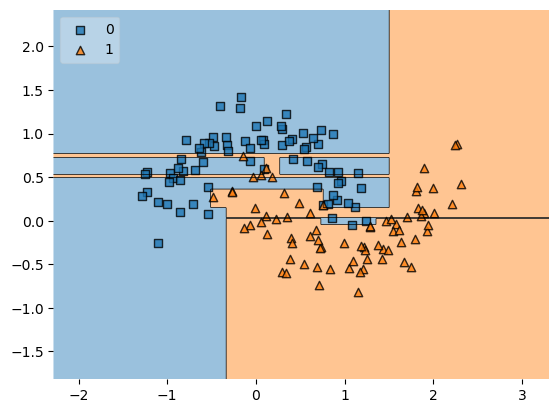

In [9]:
# Overfitting because min_samples_leaf is too small
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf1.fit(X_moons, y_moons)

plot_decision_regions(X_moons, y_moons, clf=tree_clf1, legend=2);

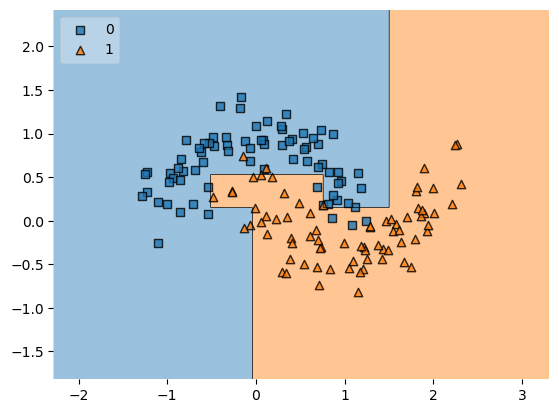

In [10]:
# Better generalization because min_samples_leaf is larger
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf2.fit(X_moons, y_moons)

plot_decision_regions(X_moons, y_moons, clf=tree_clf2, legend=2);

In [11]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [12]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

# Regression Trees
 
Let's prepare a simple quadratic training set:

**Code example:**

In [13]:
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

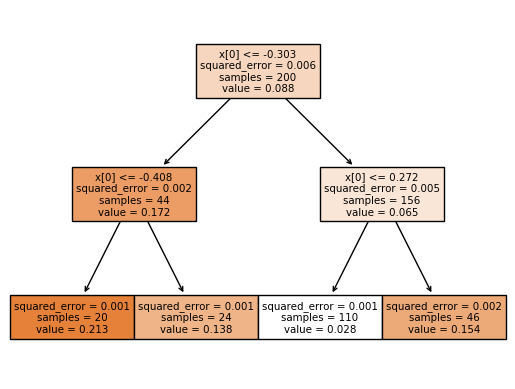

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

plot_tree(tree_reg, filled=True);